# Initialize attributes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/dataset_HW2_1.csv')

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Feature Engineering

In [ ]:
# Check the columns that might be invalid
indexAge = df[ (df['age'] < 0) & (df['age'] > 100) | (df['bmi'] < 1) ].index
df.drop(indexAge , inplace=True)

In [ ]:
# Checking the null value of coluumns. bmi and smoking status have NAN values.
print(df['gender'].isna().sum())
print(df['age'].isna().sum())
print(df['hypertension'].isna().sum())
print(df['heart_disease'].isna().sum())
print(df['ever_married'].isna().sum())
print(df['work_type'].isna().sum())
print(df['Residence_type'].isna().sum())
print(df['avg_glucose_level'].isna().sum())
print(df['bmi'].isna().sum())
print(df['smoking_status'].isna().sum())

0
0
0
0
0
0
0
0
1462
13292


In [ ]:
# Because of the number of never smoked attribute, we fill the NAN with it.
print(df["smoking_status"].value_counts())
df['smoking_status'] = df['smoking_status'].fillna("never smoked")

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64


In [ ]:
# We can see the missing values are huge and can't remove them so, we fill them. fill bmi column with the mean if the column.
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
# Drop the id column because it's not affected on predicts
del df['id']

In [ ]:
# Change the qualitatives value to quantitatives value.
df["ever_married"] = df["ever_married"].map({'Yes': 1, 'No': 0})
df["Residence_type"] = df["Residence_type"].map({'Urban': 1, 'Rural': 0})

In [ ]:
# Use one hot encoder for "gender" column
ohe =OneHotEncoder()
feature_array = ohe.fit_transform(df[["gender"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
feature_labels
features = pd.DataFrame(feature_array, columns = feature_labels)
new_df = pd.concat([df, features], axis=1)
new_df =new_df.drop(['gender'], axis=1)
df = new_df

In [ ]:
# Change the age from age to labels
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51-100']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels)

# Use one hot encoder
ohe =OneHotEncoder()
feature_array = ohe.fit_transform(df[["age"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
feature_labels
features = pd.DataFrame(feature_array, columns = feature_labels)
new_df = pd.concat([df, features], axis=1)
new_df =new_df.drop(['age'], axis=1)
df = new_df

In [ ]:
# Use one hot encoder for "work_type" column
print(df["work_type"].value_counts())
ohe =OneHotEncoder()
feature_array = ohe.fit_transform(df[["work_type"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
feature_labels
features = pd.DataFrame(feature_array, columns = feature_labels)
new_df = pd.concat([df, features], axis=1)
new_df =new_df.drop(['work_type'], axis=1)
df = new_df

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


In [ ]:
# Use one hot encoder for "smoking_status" column
ohe =OneHotEncoder()
feature_array = ohe.fit_transform(df[["smoking_status"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
feature_labels
features = pd.DataFrame(feature_array, columns = feature_labels)
new_df = pd.concat([df, features], axis=1)
new_df =new_df.drop(['smoking_status'], axis=1)
df = new_df

In [ ]:
df

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,...,36-50,51-100,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
0,0,0,0,0,95.12,18.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,0,1,1,87.96,39.2,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,1,110.89,17.6,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,0,1,0,69.04,35.9,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,161.28,19.1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0,0,1,58.64,20.4,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
43396,0,0,1,1,213.61,55.4,0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
43397,1,0,1,1,91.94,28.9,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
43398,0,0,1,1,99.16,33.2,0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Normalize the "avg_glucose_level" and "bmi" columns
scaler = MinMaxScaler()
df['avg_glucose_level'] = scaler.fit_transform(df[["avg_glucose_level"]])
df['bmi'] = scaler.fit_transform(df[["bmi"]])

In [ ]:
# Change the order of df for simple access to "stroke" column
new_order = [col for col in df.columns if col != "stroke"] + ["stroke"]
df = df[new_order]

In [ ]:
# Double check whether NAN is still in df or not
df = df.dropna()

In [ ]:
df

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Other,0-18,...,51-100,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes,stroke
0,0,0,0,0,0.169964,0.090286,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,1,0,1,1,0.139631,0.332571,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0,0,0,1,0.236772,0.085714,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,0,0,1,0,0.059479,0.294857,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0,0,0,0,0.450244,0.102857,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0,0,1,0.015420,0.117714,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
43396,0,0,1,1,0.671934,0.517714,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
43397,1,0,1,1,0.156492,0.214857,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
43398,0,0,1,1,0.187079,0.264000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


# train test split




In [ ]:
x= df.iloc[:,0:21]
y= df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

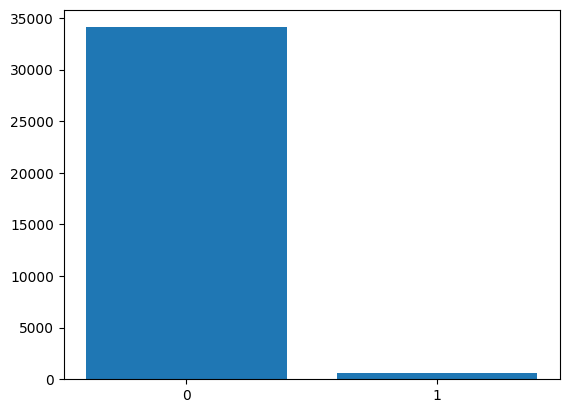

In [ ]:
x = X_train.join(y_train)
# Check the balance data
value_0 = x[x['stroke'] == 0]
value_1 = x[x['stroke'] == 1]
# ploting it
x = np.array(["0", "1"])
y = np.array([len(value_0), len(value_1)])
plt.bar(x, y)
plt.show()

In [ ]:
value_1_over =  value_1.sample(len(value_0.index), replace=True)
df_tmp = pd.concat([value_1_over, value_0], axis=0)
df = df_tmp

In [ ]:
X_train = df.iloc[:,0:21]
y_train = df.iloc[:,-1]

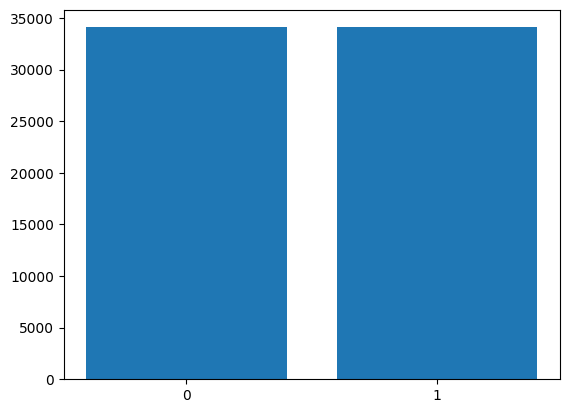

In [ ]:
# Check the balance data
value_0 = df[df['stroke'] == 0]
value_1 = df[df['stroke'] == 1]
# ploting it
x = np.array(["0", "1"])
y = np.array([len(value_0), len(value_1)])
plt.bar(x, y)
plt.show()

In [ ]:
df

,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Other,0-18,...,51-100,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes,stroke
22245,0,0,1,1,0.570599,0.211486,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
40306,0,0,1,0,0.121034,0.109714,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
41035,0,0,1,0,0.000042,0.414857,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
10363,0,0,1,0,0.024020,0.211486,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
28982,0,0,1,1,0.068757,0.188571,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32232,0,0,1,0,0.026393,0.200000,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
40978,0,0,1,0,0.281932,0.216000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
35025,1,0,1,0,0.199280,0.210286,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
21277,0,0,1,1,0.654014,0.429714,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


# Create Model


In [ ]:
# Creatinh model woth svm
clf = svm.SVC()
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
# Predict with our tests and calculate the score
pred_rf = clf.predict(X_test)
print(f'Score of the SVM: {accuracy_score(y_test, pred_rf)}')

Score of the SVM: 0.6502304147465438


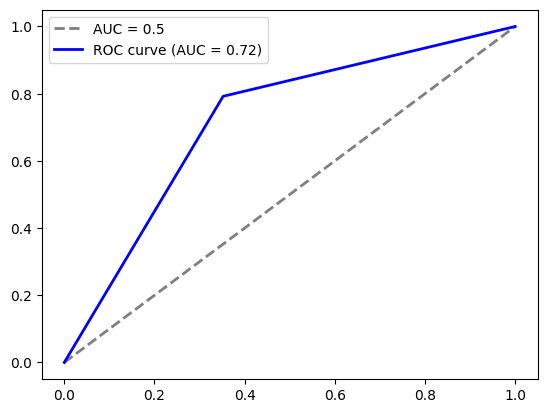

In [ ]:
# Drawing the ROC plot
fpr, tpr, threshholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', lw=2,
         linestyle='--', label='AUC = 0.5 ')
plt.plot(fpr, tpr, color='blue', lw=2,
         label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.legend()
plt.show()

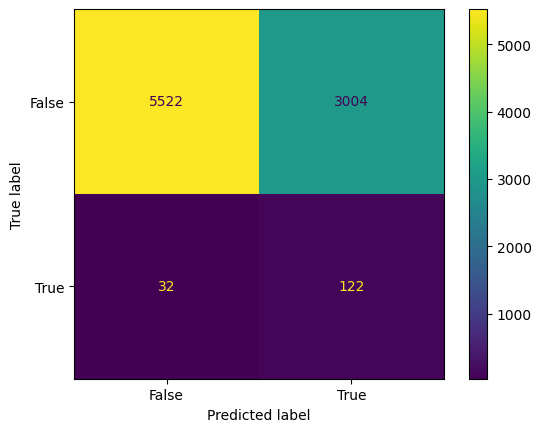

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, pred_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()